# Spatio-temporal conductivity atlas construction
This notebook presents the process to construct the spatio-temporal conductivity atlas. To explore the relationship between conductivity ($\sigma$) and postmenstual age (PMA) at a local scale, we constructed a spatio-temporal atlas using $n = 871$ EP maps reconstructed from dHCP TSE scans.

Part of nano-eptk package by Arnaud Boutillon (arnaud.boutillon@kcl.ac.uk).

## Python environment setting

In [1]:
import os
import sys

from IPython.display import Image

base_dir = os.path.abspath(os.path.join(os.path.pardir, os.path.pardir))
sys.path.append(os.path.join(base_dir))

from utils.epatlas import *
from utils.plots import *

## 1. Atlas construction
Conductivity images were non-linearly aligned to the template space at each time point (from 28 to 44 weeks PMA), using the diffeomorphisms computed from anatomical T2w images. The template space was isotropic with a resolution of $0.5$ mm. We used a temporal Gaussian weighting, with $0.5$ week STD, to build each week conductivity template. 

In [2]:
# Set directory
atlas_dir = os.path.join(base_dir, "data", "dHCP", "atlas")

# Dummy input data
sig_paths = [os.path.join(base_dir, "data", "dHCP", "example_subject", "TSE", "derivatives_pocr", "sig_in_extdhcp40wk.nii.gz")]
ages = [39.86]

# Set atlas ages and paths
atlas_ages = range(28,45)
anat_atlas_paths = [os.path.join(atlas_dir, "anat", f"week{age}_T2w.nii.gz") for age in atlas_ages]
intra_atlas_warp_paths = [os.path.join(atlas_dir, "warps", f"week-{age}_to_week-40_invwarp.nii.gz") 
                          if age != 40 else None for age in atlas_ages]
sig_atlas_paths = [os.path.join(atlas_dir, "ep", f"week{age}_sig.nii.gz") for age in atlas_ages]

# Construct EP atlas
construct_ep_atlas(
    input_ep_paths=sig_paths,
    input_ages=ages,
    input_anat_atlas_paths=anat_atlas_paths,
    input_intra_atlas_warp_paths=intra_atlas_warp_paths,
    input_atlas_ages=atlas_ages,
    output_ep_atlas_paths=sig_atlas_paths,
    age_sigma=0.5, 
)

## 2. Atlas visualization

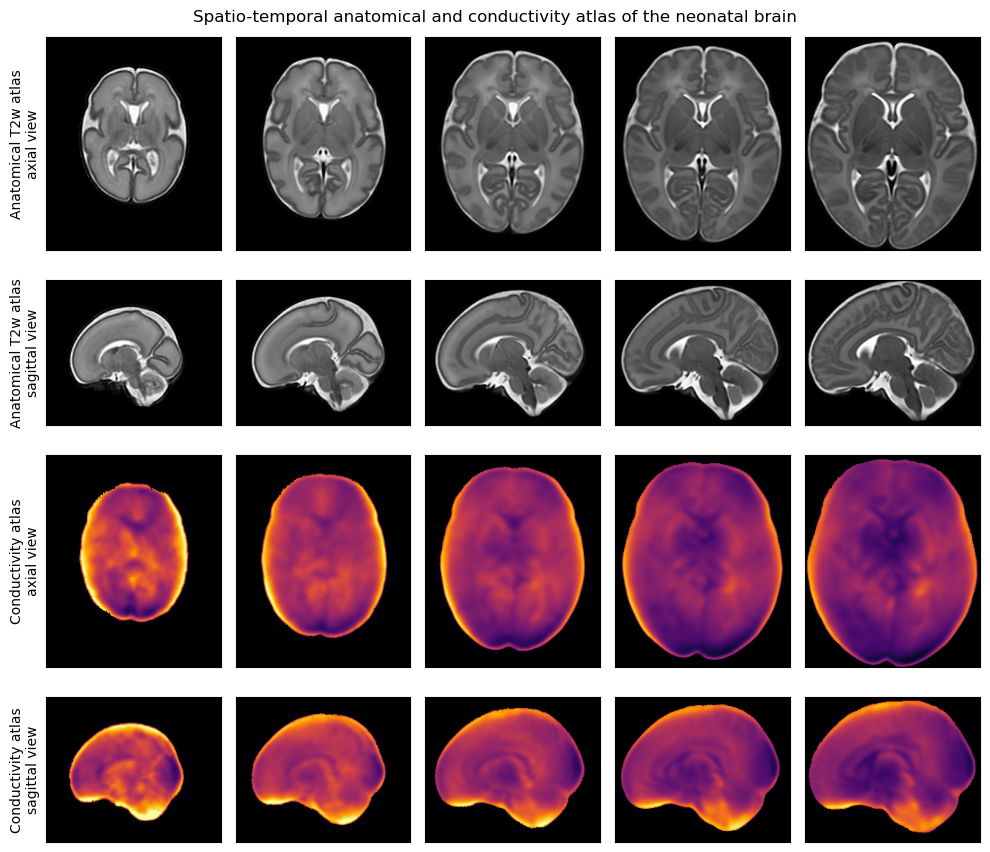

In [3]:
# Set file path
plot_path = os.path.join(base_dir, "plots", "experiments", "dhcp_atlas.png")

# Plotting
dhcp_atlas_plot(
    input_anat_atlas_paths=anat_atlas_paths,
    input_sig_atlas_paths=sig_atlas_paths,
    output_plot_path=plot_path,
    view_info={"axial": {"slice_index": 98}, "sagittal": {"slice_index": 107}},
    ages={0: 28, 4: 32, 8: 36, 12: 40, 16: 44},
    mag_clim=[0.0, 95.0],
    sig_clim=[0.6, 2.2],
    sig_cmap="inferno",
    figsize=(10, 9), 
    title="Spatio-temporal anatomical and conductivity atlas of the neonatal brain",
    save_imageio=True,
)

The spatio-temporal atlas of conductivity reveals a decline in $\sigma$ values across all brain regions from week 28 to week 44 PMA. The contrast between tissues is limited; this may be due to a genuine lack of contrast but could also be due to partial volume and smoothing effects inherent in our measurement. Notably, the fluid filled ventricles (bright on the T2w images) should exhibit higher $\sigma$, but this is not observed, similarly to previous work. Furthermore, artificially high $\sigma$ is observed at the border of the brain (as seen in the axial view $\sigma \sim 1.8-2.0\, [\textrm{S.m}^{-1}]$) due to known boundary artefacts associated with EP reconstruction.

## 3. Animations

In [4]:
# File path
gif_path = os.path.join(base_dir, "gifs")

# Create gifs
dhcp_atlas_gif(
    input_anat_atlas_paths=anat_atlas_paths,
    input_sig_atlas_paths=sig_atlas_paths,
    output_dir=gif_path,
    view_info={"axial": { "slice_index": 98}, "sagittal": {"slice_index": 107}},
    fps=10,
    alpha=0.5,
    mag_clim=[0.0, 95.0],
    sig_clim=[0.6, 2.2],
    sig_cmap="inferno",
)

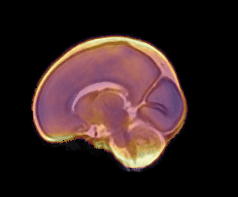

In [5]:
Image(filename=os.path.join(gif_path, "dhcp_atlas_sagittal.gif"))

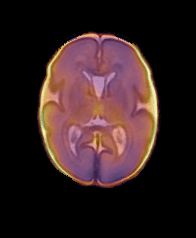

In [6]:
Image(filename=os.path.join(gif_path, "dhcp_atlas_axial.gif"))